In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import seaborn as sns

In [2]:
from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain

In [3]:
df = pd.read_csv('activities.csv')

In [4]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566
1,4/27/18,"3,649","9,971",4.70,19,"1,158",219,46,17,"1,752"
2,4/28/18,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
3,4/29/18,"2,851","1,639",0.77,0,891,122,0,0,602
4,4/30/18,"2,825","1,323",0.62,0,880,104,0,0,540


In [5]:
df.Date.value_counts().sort_values(ascending=False).head()

11/24/18    1
6/8/18      1
11/26/18    1
6/23/18     1
9/23/18     1
Name: Date, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null object
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


In [7]:
df.Date=pd.to_datetime(df.Date, format='%m/%d/%y')
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 17.7+ KB


In [8]:
dmax = df.Date.max()
dmin = df.Date.min()
dmax - dmin + timedelta(days=1)

Timedelta('225 days 00:00:00')

In [9]:
df = df.set_index('Date')

In [10]:
df.dtypes

Calories Burned            object
Steps                      object
Distance                  float64
Floors                      int64
Minutes Sedentary          object
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories          object
dtype: object

In [11]:
df['Calories Burned'] = df['Calories Burned'].str.replace(',','').astype(int)
df['Steps'] = df['Steps'].str.replace(',','').astype(int)
df['Minutes Sedentary'] = df['Minutes Sedentary'].str.replace(',','').astype(int)
df['Activity Calories'] = df['Activity Calories'].str.replace(',','').astype(int)

In [12]:
df = df.rename(columns={
    'Calories Burned': 'cals_burned',
    'Steps': 'steps',
    'Distance': 'dist',
    'Floors': 'flrs',
    'Minutes Sedentary': 'mins_sed',
    'Minutes Lightly Active': 'mins_light',
    'Minutes Fairly Active': 'mins_mod',
    'Minutes Very Active': 'mins_heavy',
    'Activity Calories': 'activity_cals',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
cals_burned      225 non-null int64
steps            225 non-null int64
dist             225 non-null float64
flrs             225 non-null int64
mins_sed         225 non-null int64
mins_light       225 non-null int64
mins_mod         225 non-null int64
mins_heavy       225 non-null int64
activity_cals    225 non-null int64
dtypes: float64(1), int64(8)
memory usage: 17.6 KB


In [13]:
df['mins_tot'] = df.mins_sed + df.mins_light + df.mins_mod + df.mins_heavy
df.head()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot
Date,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984


In [14]:
df['mins_off'] = 1440 - df.mins_tot
df.head(5)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
Date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440,0
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440,0
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890,550
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013,427
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984,456


In [15]:
import wrangle_fitbit as wf

In [16]:
df = wf.get_activities_data()
frame_splain(df, splain=True, maxcols=15)

DATAFRAME SHAPE:
(225, 15)

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 15 columns):
cals_burned          225 non-null float64
steps                225 non-null float64
dist                 225 non-null float64
flrs                 225 non-null float64
mins_sed             225 non-null float64
mins_light           225 non-null float64
mins_mod             225 non-null float64
mins_heavy           225 non-null float64
activity_cals        225 non-null float64
mins_tot             225 non-null float64
mins_off             225 non-null float64
week_day             225 non-null object
cals_idle            225 non-null float64
mins_idle            225 non-null float64
idle_cals_per_min    225 non-null float64
dtypes: float64(14), object(1)
memory usage: 28.1+ KB
None

DATAFRAME DESCRIPTION:
                   count         mean          std         min          25%  \
cals_burned        225.0  3401.911111   6

In [17]:
df.head().T

date,2018-04-26 00:00:00,2018-04-27 00:00:00,2018-04-28 00:00:00,2018-04-29 00:00:00,2018-04-30 00:00:00
cals_burned,2635,3649,3379,2851,2825
steps,2931,9971,3521,1639,1323
dist,1.38,4.7,1.66,0.77,0.62
flrs,2,19,2,0,0
mins_sed,1347,1158,702,891,880
mins_light,93,219,155,122,104
mins_mod,0,46,22,0,0
mins_heavy,0,17,11,0,0
activity_cals,566,1752,1124,602,540
mins_tot,1440,1440,890,1013,984


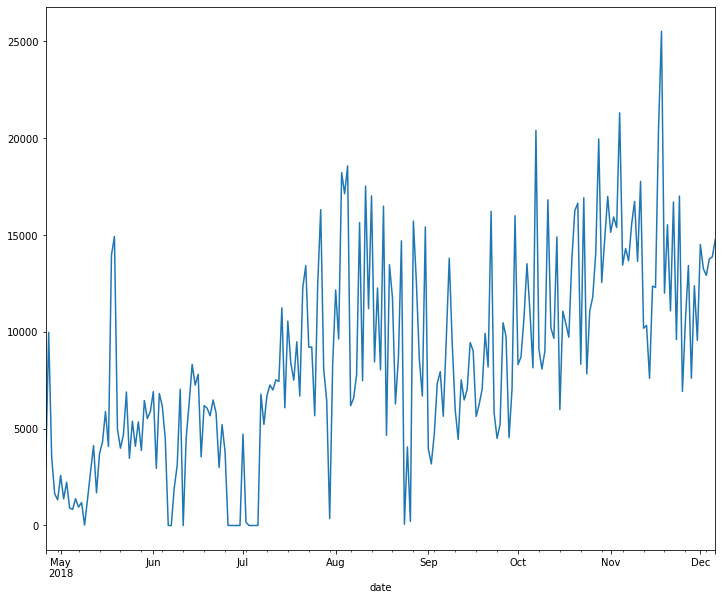

In [18]:
plt.figure(figsize=(12,10))
df.steps.plot()
plt.show()

In [124]:
df[(df.steps==0) | (df.cals_burned < 2000)]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,non_idle_cals,daily_rest_cals,energy_mins,activity_cal_rate,cal_rate_idx
date,,,,,,,,,,,,,,,,,,,,
2018-06-06,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,3-Wed,2145.0,1440.0,1.489583,0.000000,2145.000000,0.0,NaN,NaN
2018-06-07,2146.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,4-Thu,2146.0,1440.0,1.490278,1.000000,2146.000000,0.0,NaN,NaN
2018-06-11,2146.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,1-Mon,2146.0,1440.0,1.490278,1.000000,2146.000000,0.0,NaN,NaN
2018-06-26,2144.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,2-Tue,2144.0,1440.0,1.488889,-1.000000,2144.000000,0.0,NaN,NaN
2018-06-27,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,3-Wed,2145.0,1440.0,1.489583,0.000000,2145.000000,0.0,NaN,NaN
2018-06-28,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,4-Thu,2145.0,1440.0,1.489583,0.000000,2145.000000,0.0,NaN,NaN
2018-06-29,2180.0,0.0,0.0,0.0,1437.0,3.0,0.0,0.0,39.0,1440.0,0.0,5-Fri,2141.0,1437.0,1.489910,39.468750,2145.469729,9.0,4.333333,2.908454
2018-06-30,2145.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,6-Sat,2145.0,1440.0,1.489583,0.000000,2145.000000,0.0,NaN,NaN
2018-07-03,2144.0,0.0,0.0,0.0,1440.0,0.0,0.0,0.0,0.0,1440.0,0.0,2-Tue,2144.0,1440.0,1.488889,-1.000000,2144.000000,0.0,NaN,NaN


In [20]:
df[df.cals_burned<1000]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,,
2018-08-26,799.0,207.0,0.1,1.0,28.0,13.0,0.0,0.0,51.0,41.0,1399.0,0-Sun,748.0,1427.0,0.524177


In [21]:
df['cals_idle'] = df.cals_burned - df.activity_cals
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 15 columns):
cals_burned          225 non-null float64
steps                225 non-null float64
dist                 225 non-null float64
flrs                 225 non-null float64
mins_sed             225 non-null float64
mins_light           225 non-null float64
mins_mod             225 non-null float64
mins_heavy           225 non-null float64
activity_cals        225 non-null float64
mins_tot             225 non-null float64
mins_off             225 non-null float64
week_day             225 non-null object
cals_idle            225 non-null float64
mins_idle            225 non-null float64
idle_cals_per_min    225 non-null float64
dtypes: float64(14), object(1)
memory usage: 28.1+ KB


In [22]:
def df_limit_numerics(df):
    new_df = df[list(df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64') | (df.dtypes == 'bool')])]
    return new_df

In [23]:
dfn=df_limit_numerics(df)
dfn.dtypes

cals_burned          float64
steps                float64
dist                 float64
flrs                 float64
mins_sed             float64
mins_light           float64
mins_mod             float64
mins_heavy           float64
activity_cals        float64
mins_tot             float64
mins_off             float64
cals_idle            float64
mins_idle            float64
idle_cals_per_min    float64
dtype: object

In [24]:
dfn.head(25)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,0.0,2069.0,1347.0,1.536006
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,0.0,1897.0,1158.0,1.638169
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,890.0,550.0,2255.0,1252.0,1.801118
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,427.0,2249.0,1318.0,1.706373
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,456.0,2285.0,1336.0,1.710329
2018-05-01,3292.0,2581.0,1.22,0.0,919.0,167.0,13.0,2.0,1068.0,1101.0,339.0,2224.0,1258.0,1.767886
2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0,1017.0,423.0,2241.0,1350.0,1.660000
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,391.0,2115.0,1267.0,1.669298
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,367.0,2253.0,1379.0,1.633793


In [25]:
def all_line_plots(df):
    for col in df_limit_numerics(df).columns:
        plt.figure(figsize=(7,5))
        df[col].plot()
        plt.ylabel(col)
        plt.show()

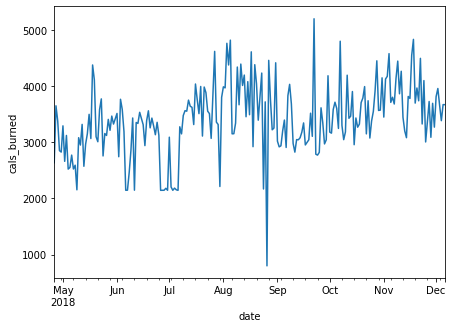

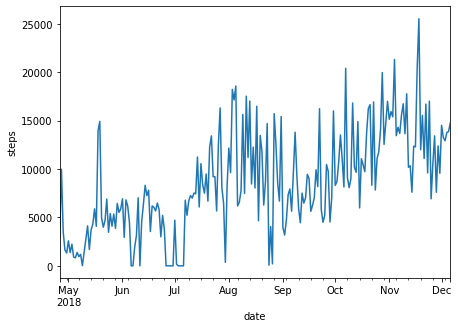

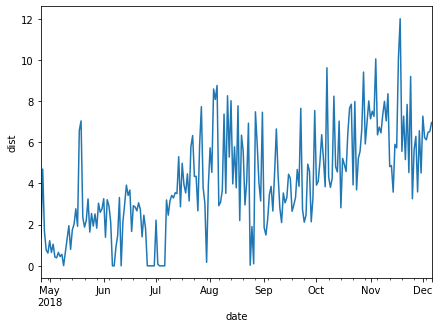

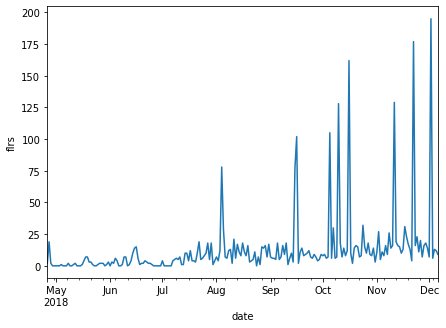

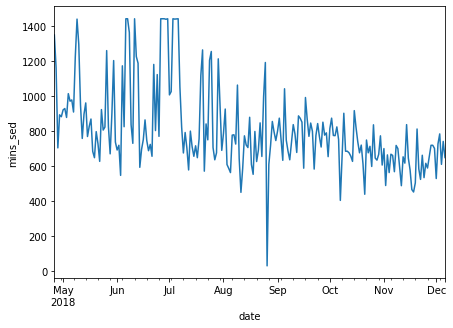

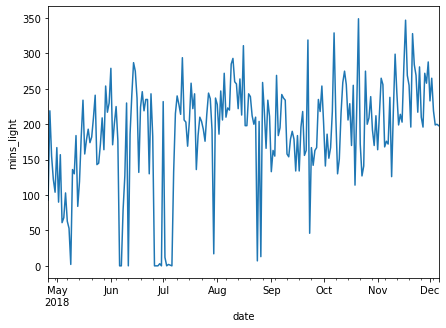

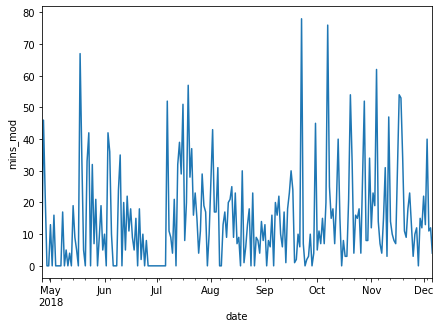

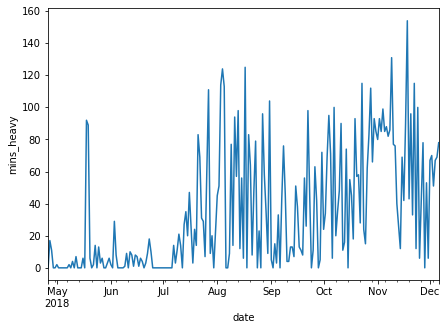

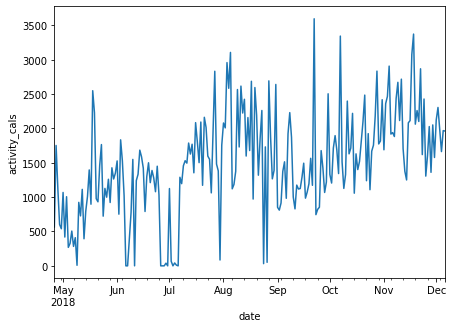

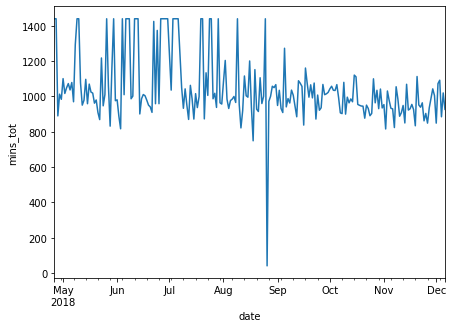

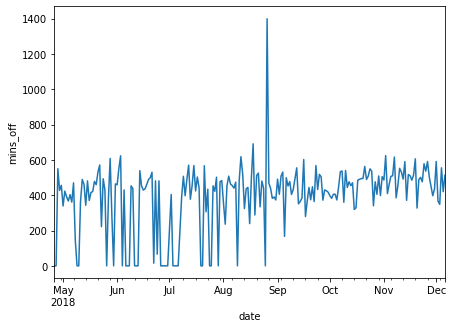

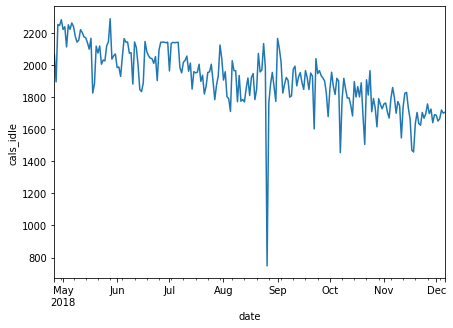

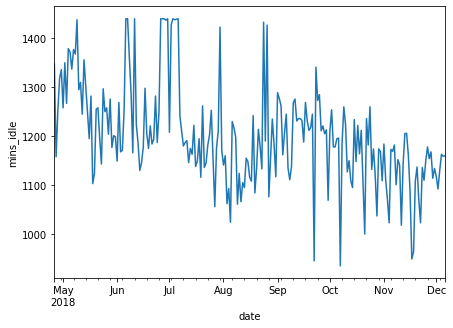

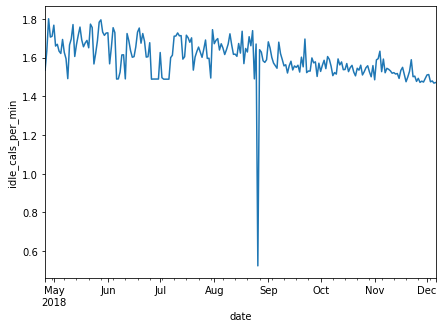

In [26]:
all_line_plots(df)

## Floors: Major outliers in the increased-activity segment

Floors spikes 9 times, suggesting there is either a stress-test, climb, bike ride, or some other unusual activity involving high increases in elevation. The heatmap does not reveal a direct correlation between floors and any other variable, suggesting that the elevation-changing activity is a transplanting some other elevated activity that would otherwise occur.

To investigate further, we've pulled these 9 dates:

In [189]:
df[df.flrs >= 50]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,...,week_day,cals_idle,mins_idle,idle_cals_per_min,non_idle_cals,daily_rest_cals,energy_mins,activity_cal_rate,cal_rate_idx,cals_burned_pred
date,,,,,,,,,,,,,,,,,,,,,
2018-08-04,4376.0,17126.0,8.08,78.0,585.0,206.0,17.0,124.0,2584.0,932.0,...,6-Sat,1792.0,1093.0,1.639524,2747.885417,2360.914913,1438.5,1.796316,1.095632,4320.00
2018-09-15,3180.0,9445.0,4.45,77.0,849.0,134.0,23.0,51.0,1287.0,1057.0,...,6-Sat,1893.0,1232.0,1.536526,1344.833333,2212.597403,811.5,1.585952,1.032167,3375.00
2018-09-16,3344.0,9015.0,4.25,102.0,586.0,184.0,30.0,38.0,1494.0,838.0,...,0-Sun,1850.0,1188.0,1.557239,1574.375000,2242.424242,915.0,1.632787,1.048514,3521.25
2018-10-05,3603.0,11029.0,5.20,105.0,822.0,167.0,7.0,71.0,1684.0,1067.0,...,5-Fri,1919.0,1195.0,1.605858,1822.947917,2312.435146,958.5,1.756912,1.094064,3600.00
2018-10-10,3183.0,8996.0,4.24,128.0,683.0,151.0,18.0,48.0,1330.0,900.0,...,3-Wed,1853.0,1223.0,1.515127,1361.239583,2181.782502,822.0,1.618005,1.067901,3397.50
2018-10-16,3432.0,11061.0,5.22,162.0,819.0,229.0,8.0,55.0,1630.0,1111.0,...,2-Tue,1802.0,1148.0,1.569686,1721.958333,2260.348432,1053.0,1.547958,0.986158,3723.75
2018-11-11,4264.0,17761.0,8.36,129.0,486.0,299.0,47.0,76.0,2717.0,908.0,...,0-Sun,1547.0,1018.0,1.519646,2747.604167,2188.290766,1564.5,1.736657,1.142803,4488.75
2018-11-22,4494.0,16705.0,7.84,177.0,522.0,284.0,18.0,115.0,2868.0,939.0,...,4-Thu,1626.0,1023.0,1.589443,2970.156250,2288.797654,1623.0,1.767098,1.111772,4578.75
2018-12-02,3957.0,13257.0,6.23,195.0,725.0,265.0,13.0,70.0,2305.0,1073.0,...,0-Sun,1652.0,1092.0,1.512821,2330.375000,2178.461538,1273.5,1.809973,1.196423,4050.00


What we found was more confusing than not. One would expect changing elevation from 750 to 2000 feet would require more than light exertion, however the moderate and heavy values do not support such an increase. The only conceivable way these values match up is if the elevation change occured during times of light activity, such as a non-brisk walk.

That, or the fitbit was faulty.

In [183]:
df.describe().columns

Index(['cals_burned', 'steps', 'dist', 'flrs', 'mins_sed', 'mins_light',
       'mins_mod', 'mins_heavy', 'activity_cals', 'mins_tot', 'mins_off',
       'cals_idle', 'mins_idle', 'idle_cals_per_min', 'non_idle_cals',
       'daily_rest_cals', 'energy_mins', 'activity_cal_rate', 'cal_rate_idx',
       'cals_burned_pred'],
      dtype='object')

In [27]:
# sns.pairplot(df)

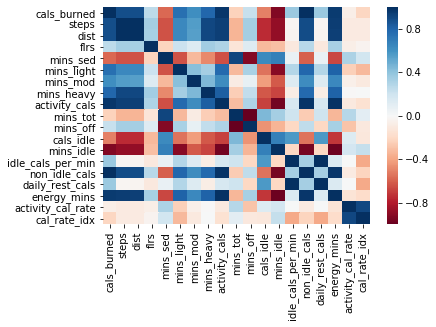

In [126]:
cor = df.corr()

sns.heatmap(cor, cmap='RdBu')

In [29]:
dfwd=df.select_dtypes(exclude='object').diff(1)
dfwd

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,
2018-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-27,1014.0,7040.0,3.32,17.0,-189.0,126.0,46.0,17.0,1186.0,0.0,0.0,-172.0,-189.0,0.102163
2018-04-28,-270.0,-6450.0,-3.04,-17.0,-456.0,-64.0,-24.0,-6.0,-628.0,-550.0,550.0,358.0,94.0,0.162949
2018-04-29,-528.0,-1882.0,-0.89,-2.0,189.0,-33.0,-22.0,-11.0,-522.0,123.0,-123.0,-6.0,66.0,-0.094745
2018-04-30,-26.0,-316.0,-0.15,0.0,-11.0,-18.0,0.0,0.0,-62.0,-29.0,29.0,36.0,18.0,0.003956
2018-05-01,467.0,1258.0,0.60,0.0,39.0,63.0,13.0,2.0,528.0,117.0,-117.0,-61.0,-78.0,0.057556
2018-05-02,-632.0,-1209.0,-0.57,0.0,8.0,-77.0,-13.0,-2.0,-649.0,-84.0,84.0,17.0,92.0,-0.107886
2018-05-03,461.0,860.0,0.40,0.0,-51.0,67.0,16.0,0.0,587.0,32.0,-32.0,-126.0,-83.0,0.009298
2018-05-04,-599.0,-1328.0,-0.62,1.0,136.0,-96.0,-16.0,0.0,-737.0,24.0,-24.0,138.0,112.0,-0.035505


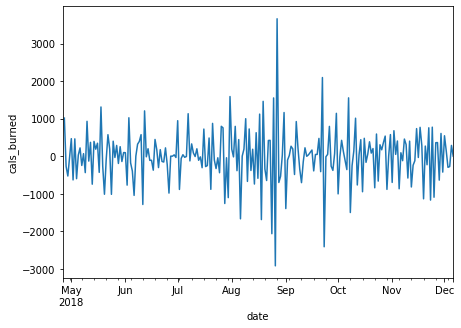

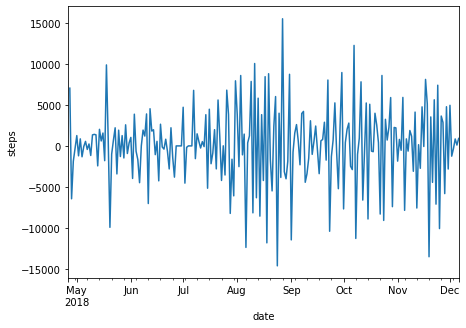

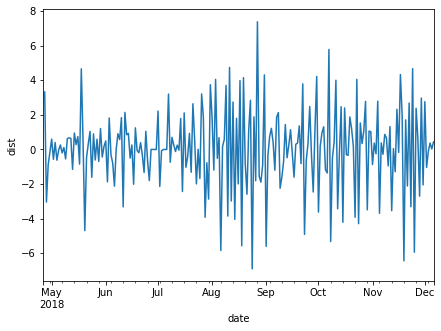

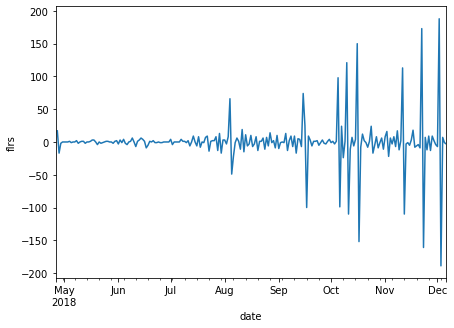

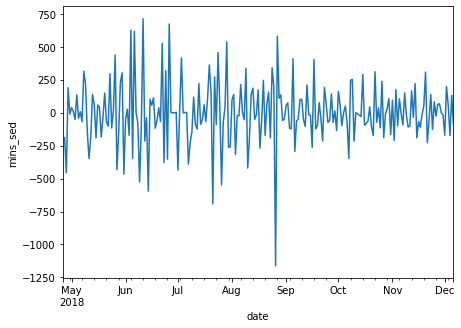

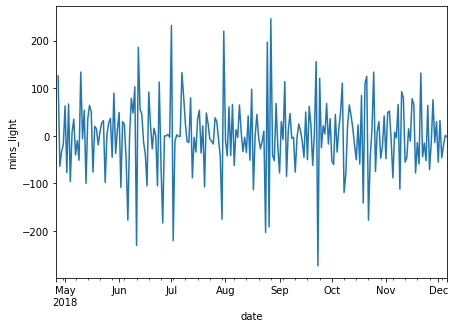

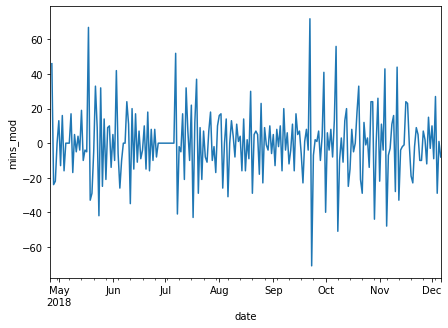

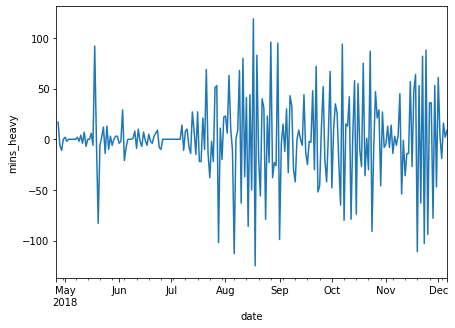

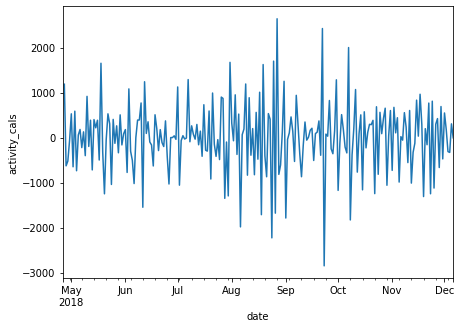

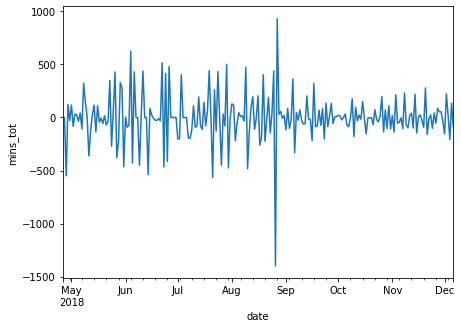

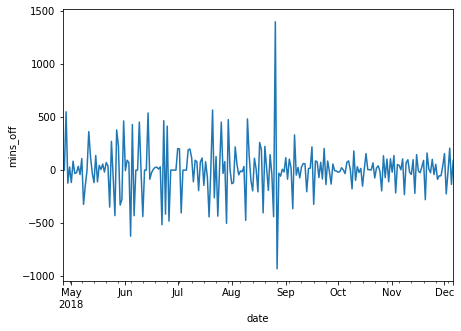

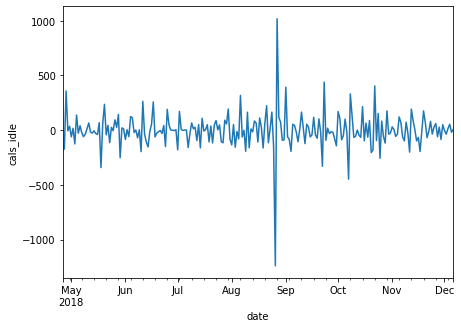

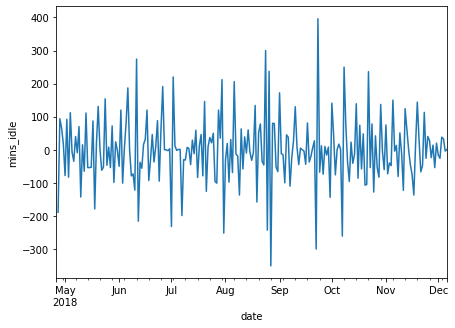

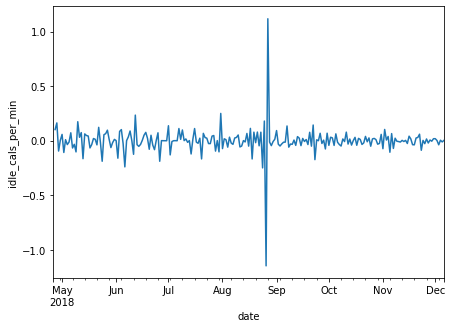

In [30]:
all_line_plots(dfwd)

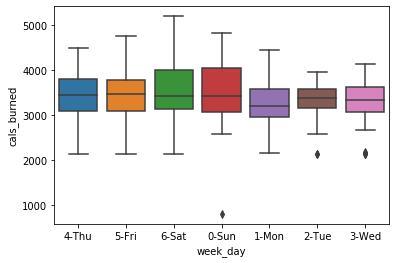

In [31]:
sns.boxplot(data=df,x='week_day',y='cals_burned')

In [32]:
def all_box_plots(df, x_col='week_day'):
    new_df = df.copy()
    new_df = new_df.sort_values(by=x_col)
    for col in df_limit_numerics(df).columns:
        
        plt.figure(figsize=(7,5))
        sns.boxplot(data=new_df,x=x_col,y=col,showmeans=True)

        plt.hlines(df[col].mean(),0,6, color='limegreen')
        plt
        plt.ylabel(col)
        plt.show()

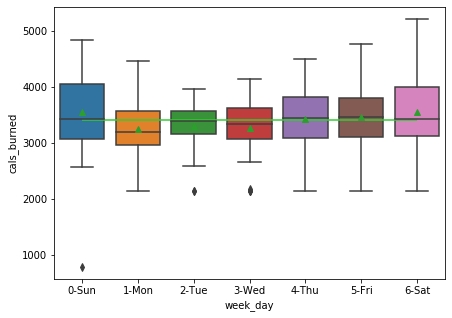

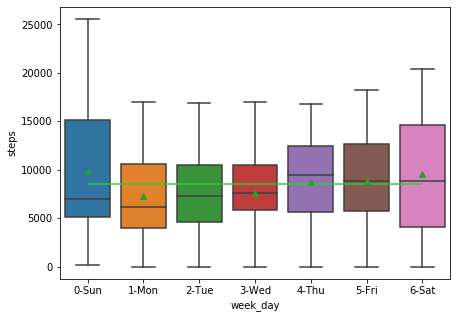

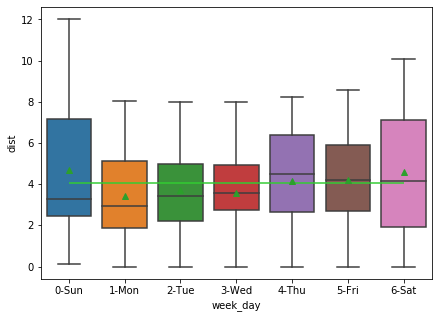

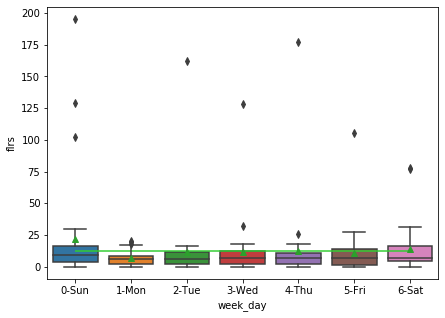

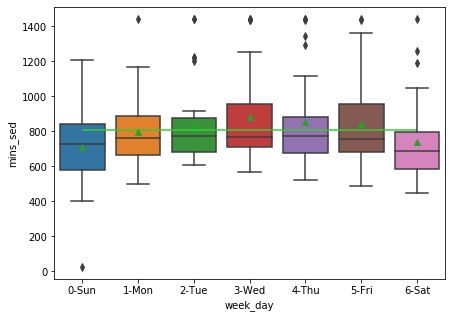

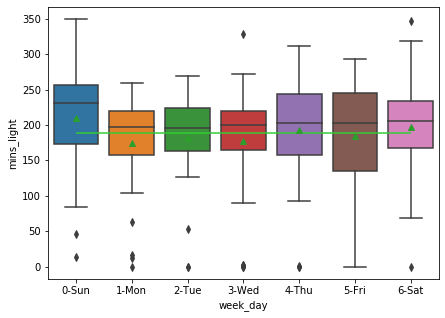

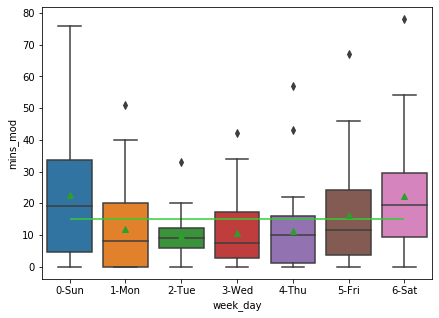

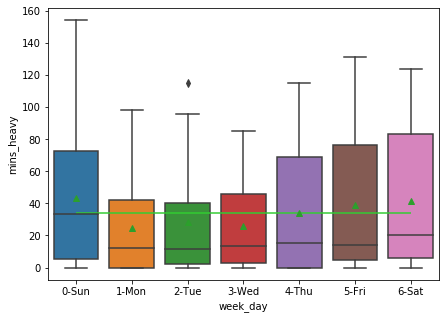

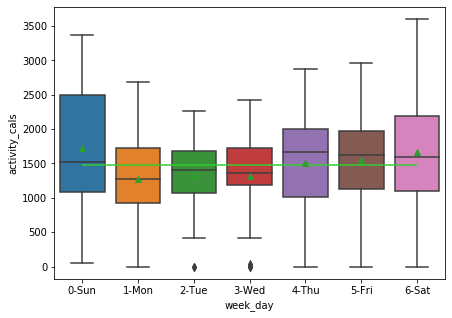

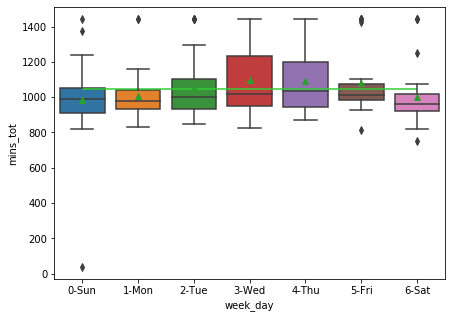

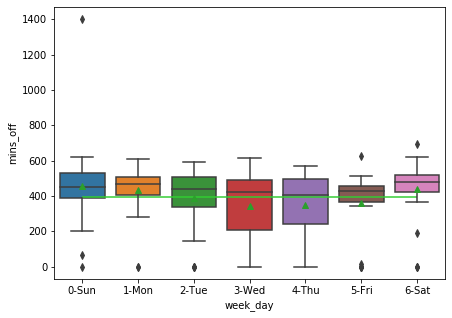

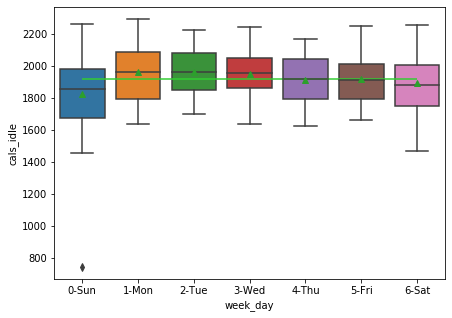

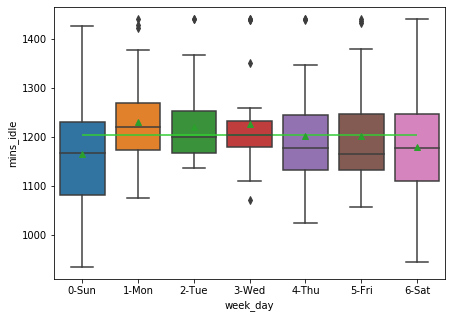

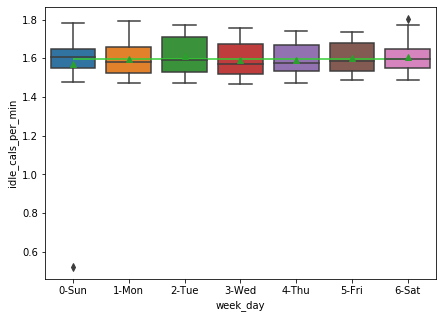

In [33]:
all_box_plots(df)

In [34]:
# dfd['avg_7d']= dfd.coffee_consumption.rolling(7).mean()
# dfd['avg_28d']= dfd.coffee_consumption.rolling(28).mean()


In [35]:
# plt.figure(figsize=(12,4))
# plt.plot(dfn.resample('W').mean().diff(periods=1),color='red')
# plt.plot(dfn.resample('W').mean().diff(periods=4),color='orange')
# plt.plot(dfn.diff(periods=10),color='green')
# plt.plot(dfn.resample('MS').mean().diff(periods=1),color='blue')

In [36]:
df[df.mins_sed==0]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,,


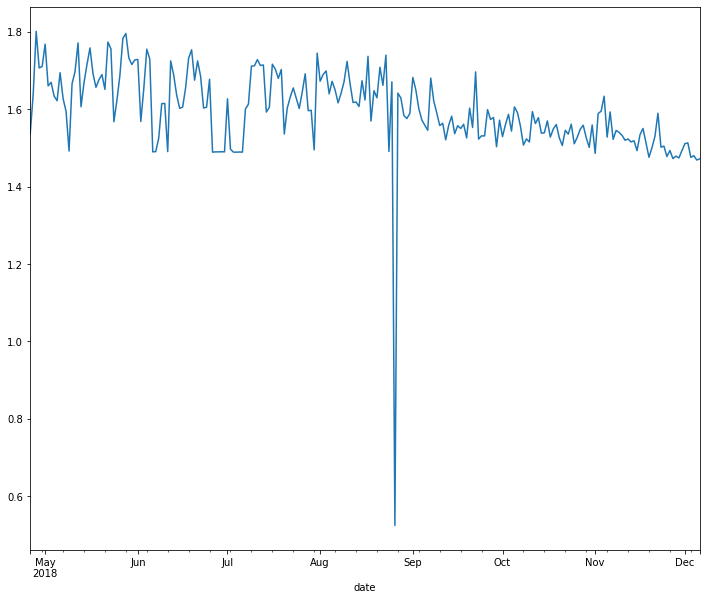

In [37]:
#df['idle_cals_per_min'] = df.cals_idle/(df.mins_sed+df.mins_off)
plt.figure(figsize=(12,10))
df.idle_cals_per_min.plot()
plt.show()

In [38]:
df[df.idle_cals_per_min>5]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,,


In [39]:
def all_line_5sample_plots(df):
    for col in df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]:
        plt.figure(figsize=(12,8))
        plt.plot(df[col].rolling(3).mean(),color='firebrick')
#         plt.plot(df[col].rolling(5).mean(),color='orange')
        plt.plot(df[col].rolling(7).mean(),color='gold')
#         plt.plot(df[col].rolling(10).mean(),color='green')
        plt.plot(df[col].rolling(14).mean(),color='blue')
        plt.ylabel(col)
        plt.show()

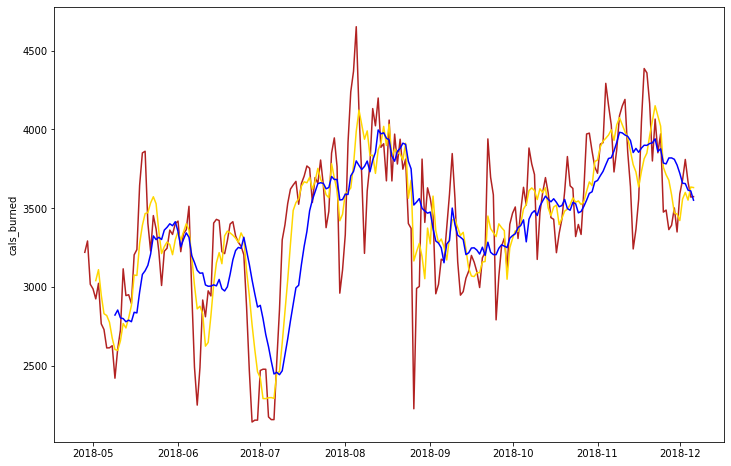

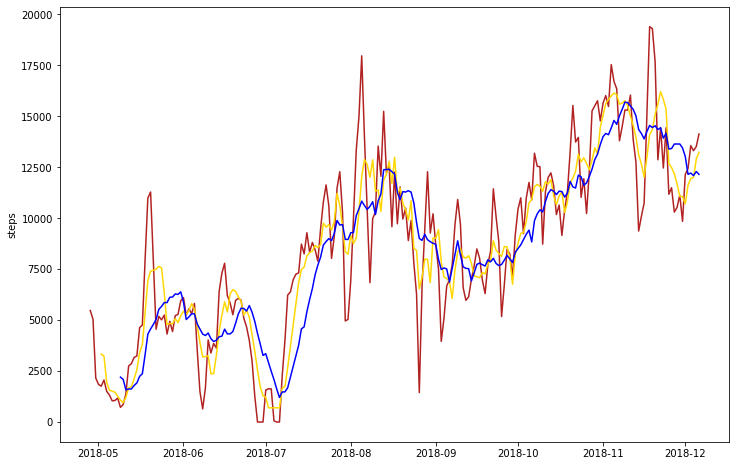

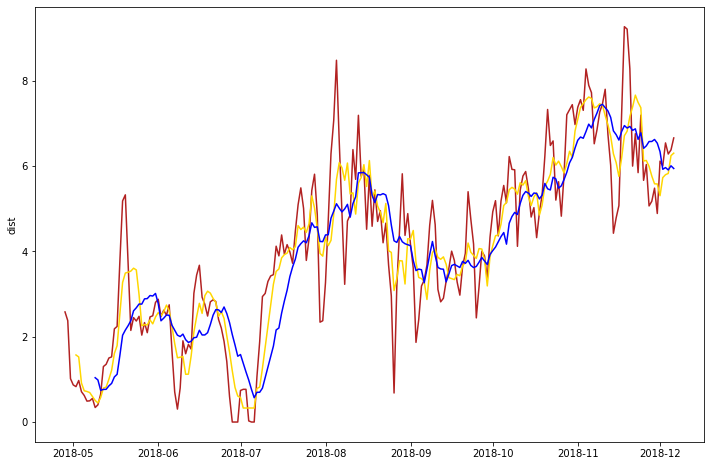

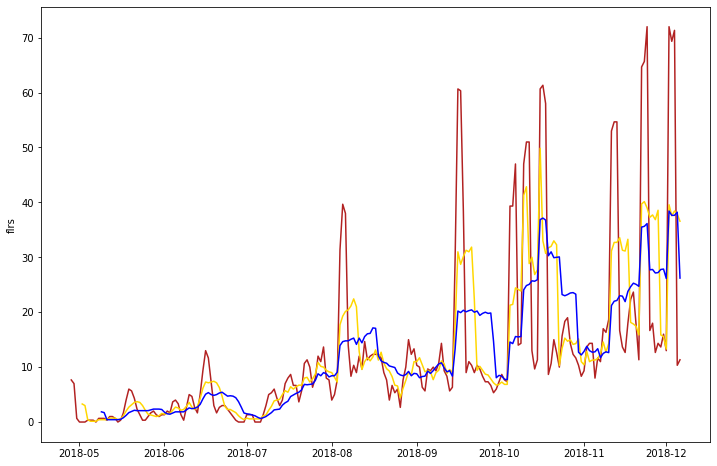

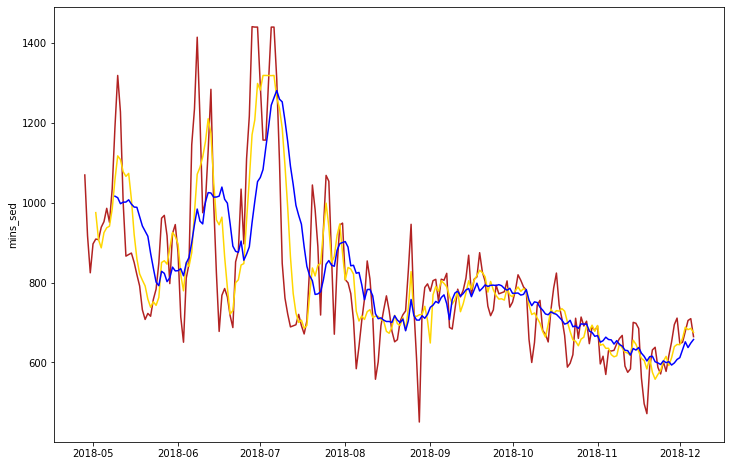

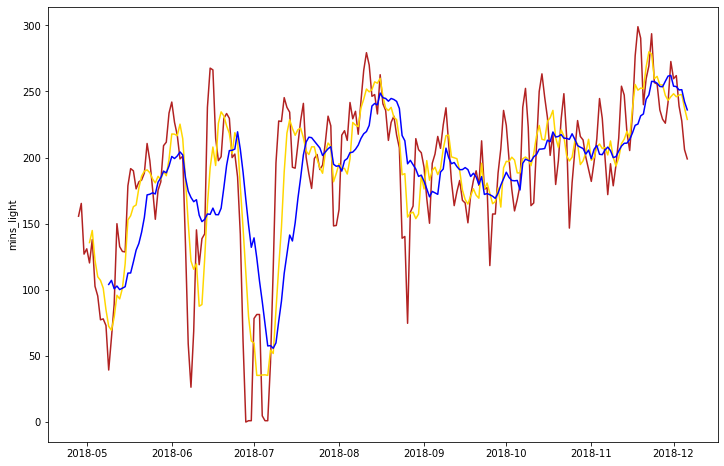

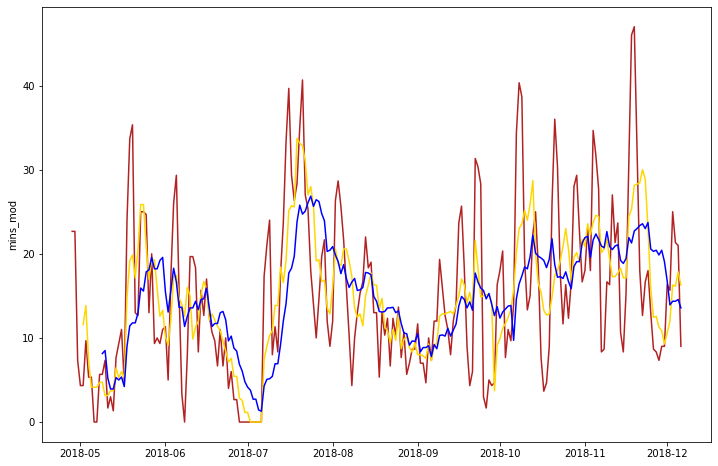

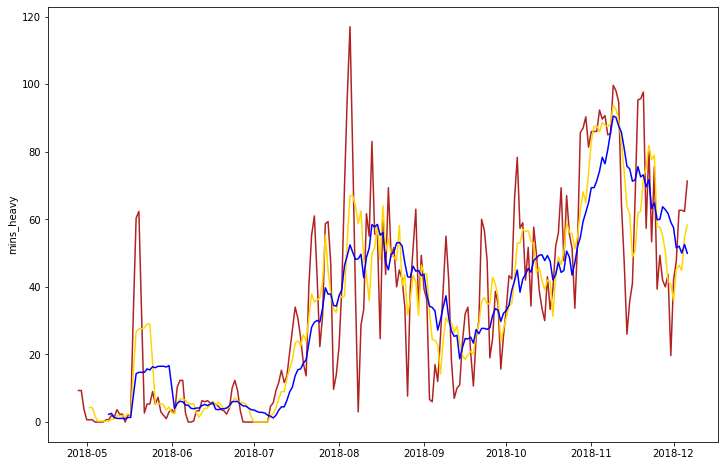

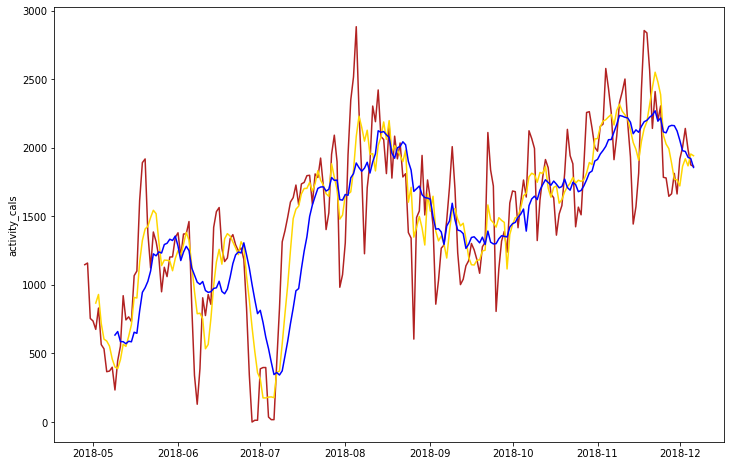

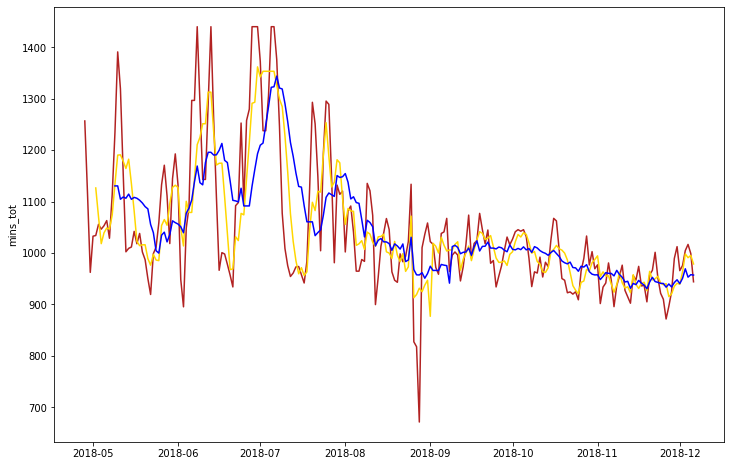

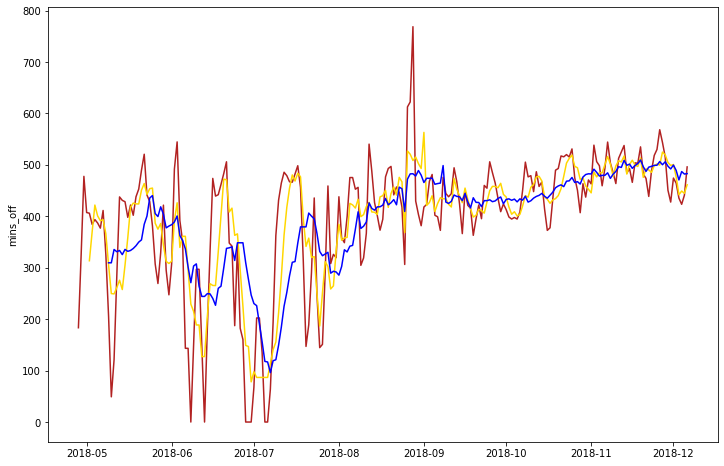

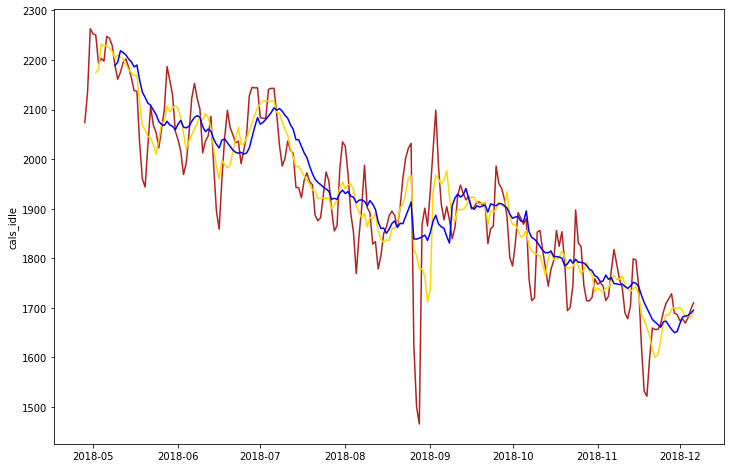

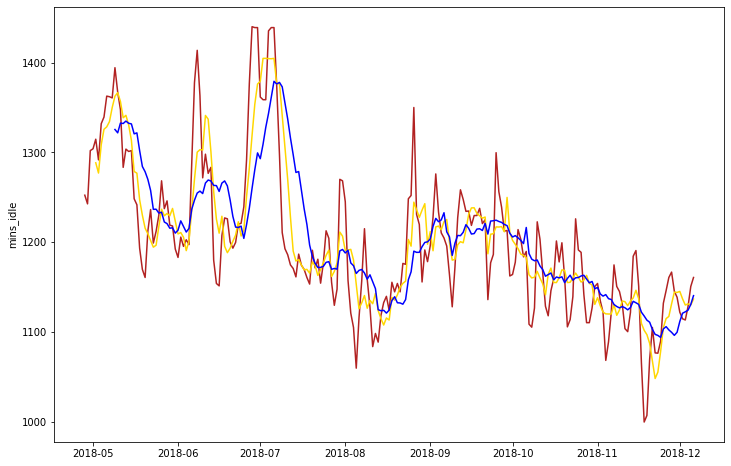

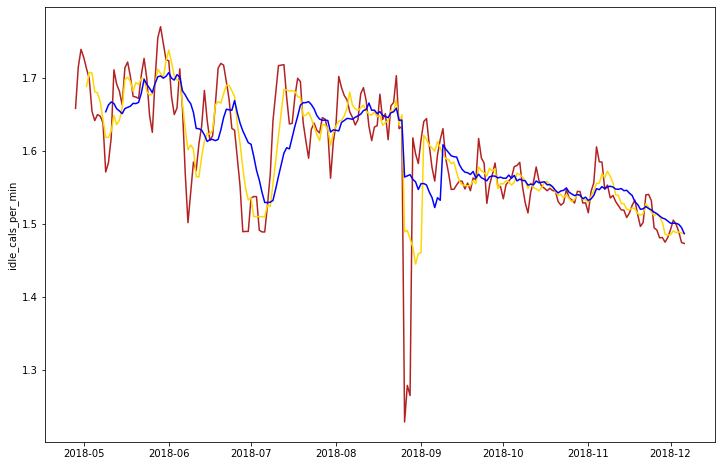

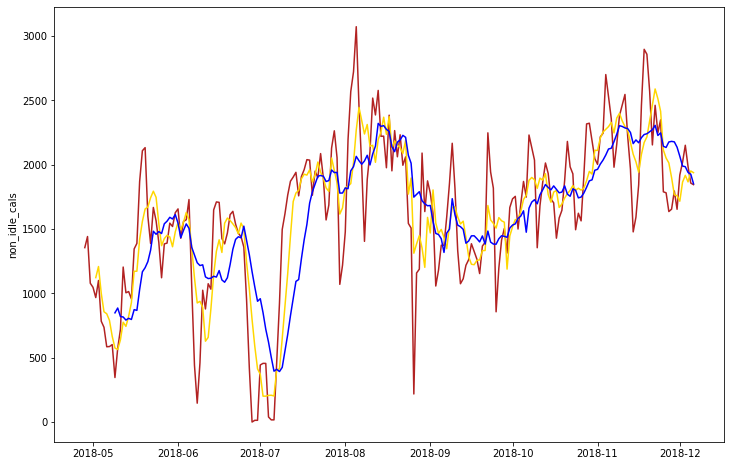

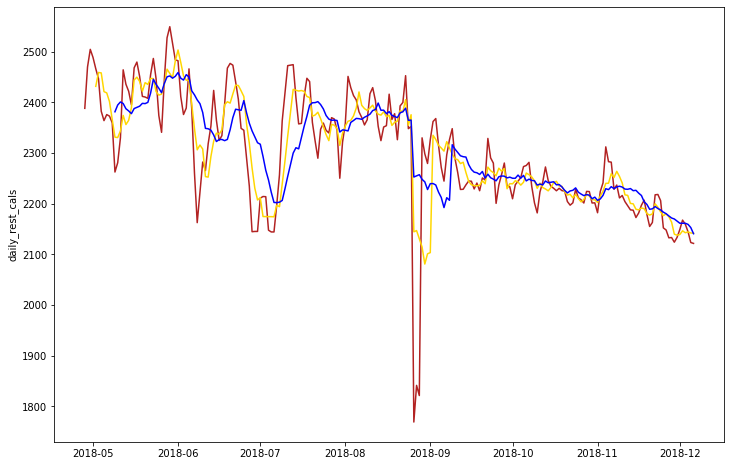

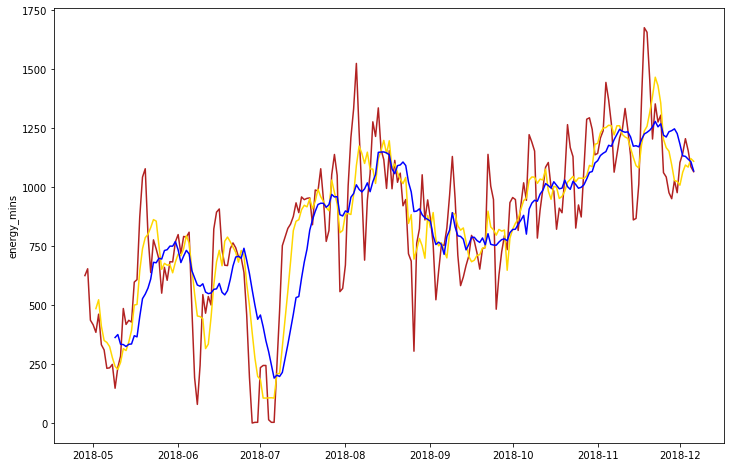

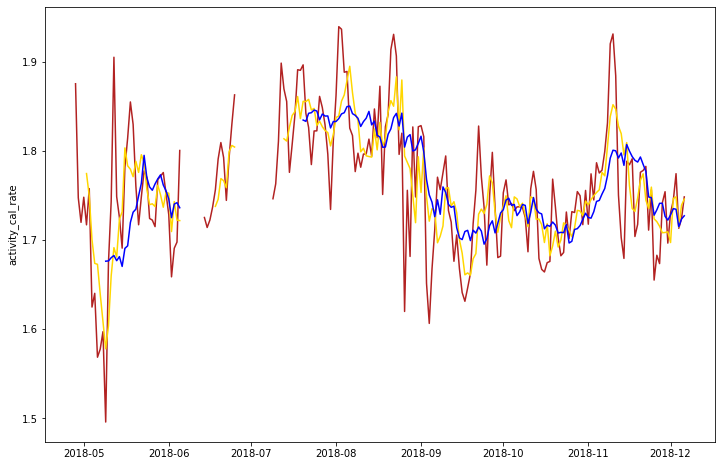

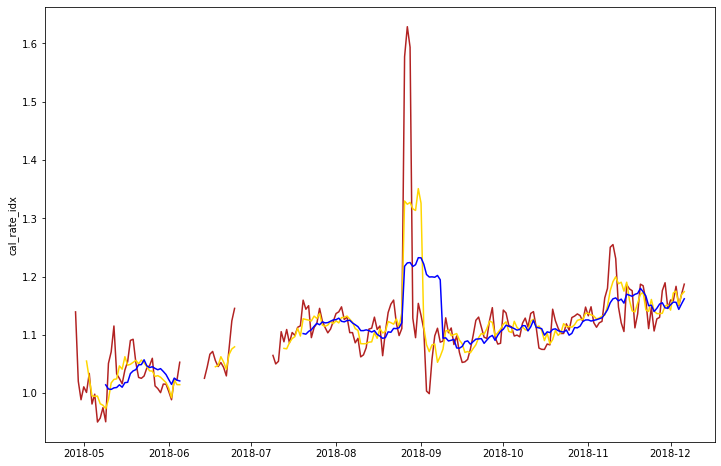

In [125]:
all_line_5sample_plots(df)

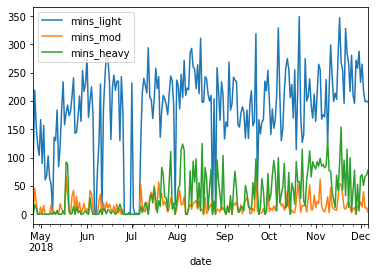

In [41]:
df[['mins_light','mins_mod','mins_heavy']].plot()

In [42]:
df[(df.mins_light==0) | (df.mins_mod==0) | (df.mins_heavy==0)]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min
date,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,0.0,4-Thu,2069.0,1347.0,1.536006
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,427.0,0-Sun,2249.0,1318.0,1.706373
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,456.0,1-Mon,2285.0,1336.0,1.710329
2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0,1017.0,423.0,3-Wed,2241.0,1350.0,1.660000
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,391.0,4-Thu,2115.0,1267.0,1.669298
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,367.0,5-Fri,2253.0,1379.0,1.633793
2018-05-05,2551.0,833.0,0.39,0.0,969.0,68.0,0.0,0.0,326.0,1037.0,403.0,6-Sat,2225.0,1372.0,1.621720
2018-05-06,2771.0,1383.0,0.65,0.0,976.0,103.0,0.0,0.0,506.0,1079.0,361.0,0-Sun,2265.0,1337.0,1.694091
2018-05-07,2524.0,952.0,0.45,0.0,907.0,63.0,0.0,0.0,283.0,970.0,470.0,1-Mon,2241.0,1377.0,1.627451


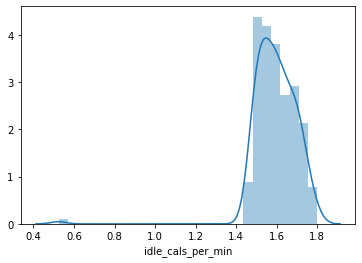

In [43]:
sns.distplot(df.idle_cals_per_min)

In [44]:
df.idle_cals_per_min.describe()

count    225.000000
mean       1.595770
std        0.110007
min        0.524177
25%        1.527823
50%        1.593611
75%        1.669298
max        1.801118
Name: idle_cals_per_min, dtype: float64

In [45]:
df['non_idle_cals']= df.cals_burned - ((df.mins_sed + df.mins_off) * 2145 / 1440)

In [115]:
df[df.mins_off!=0]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,non_idle_cals,daily_rest_cals,energy_mins,activity_cal_rate,cal_rate_idx
date,,,,,,,,,,,,,,,,,,,,
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,890.0,550.0,6-Sat,2255.0,1252.0,1.801118,1514.041667,2593.610224,630.0,1.784127,0.990566
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,427.0,0-Sun,2249.0,1318.0,1.706373,887.729167,2457.177542,366.0,1.644809,0.963921
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,456.0,1-Mon,2285.0,1336.0,1.710329,834.916667,2462.874251,312.0,1.730769,1.011951
2018-05-01,3292.0,2581.0,1.22,0.0,919.0,167.0,13.0,2.0,1068.0,1101.0,339.0,2-Tue,2224.0,1258.0,1.767886,1418.104167,2545.755167,571.5,1.868766,1.057063
2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0,1017.0,423.0,3-Wed,2241.0,1350.0,1.660000,649.062500,2390.400000,270.0,1.551852,0.934851
2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0,1049.0,391.0,4-Thu,2115.0,1267.0,1.669298,1233.697917,2403.788477,543.0,1.852670,1.109850
2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0,1073.0,367.0,5-Fri,2253.0,1379.0,1.633793,467.864583,2352.661349,183.0,1.469945,0.899714
2018-05-05,2551.0,833.0,0.39,0.0,969.0,68.0,0.0,0.0,326.0,1037.0,403.0,6-Sat,2225.0,1372.0,1.621720,507.291667,2335.276968,204.0,1.598039,0.985398
2018-05-06,2771.0,1383.0,0.65,0.0,976.0,103.0,0.0,0.0,506.0,1079.0,361.0,0-Sun,2265.0,1337.0,1.694091,779.427083,2439.491399,309.0,1.637540,0.966619


In [47]:
df[df.cals_burned < 2143]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,week_day,cals_idle,mins_idle,idle_cals_per_min,non_idle_cals
date,,,,,,,,,,,,,,,,
2018-08-26,799.0,207.0,0.1,1.0,28.0,13.0,0.0,0.0,51.0,41.0,1399.0,0-Sun,748.0,1427.0,0.524177,-1326.635417


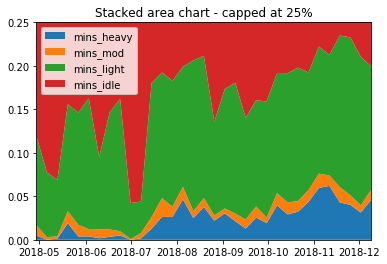

In [64]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import plotly.graph_objects as go
 
# Make data
cols = ['mins_heavy','mins_mod','mins_light','mins_idle']
data = df[cols].resample('W').mean()

# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(data.index, data_perc['mins_heavy'], data_perc['mins_mod'], data_perc['mins_light'], data_perc['mins_idle'], labels=cols)
# plt.stackplot(data)
plt.legend(loc='upper left')
plt.margins(0,0)
axes=plt.gca()
axes.set_ylim([0,0.25])
plt.title('Stacked area chart - capped at 25%')
plt.show()


In [65]:
df['daily_rest_cals'] = df.idle_cals_per_min * 1440

In [73]:
display(df.resample('2W').mean().iloc[:1, :])
display(df.resample('2W').mean().iloc[-1:, :])

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min,non_idle_cals,daily_rest_cals
date,,,,,,,,,,,,,,,,
2018-04-29,3128.5,4515.5,2.1275,5.75,1024.5,147.25,17.0,7.0,1011.0,1195.75,244.25,2117.5,1268.75,1.670417,1238.591146,2405.400012


,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle,mins_idle,idle_cals_per_min,non_idle_cals,daily_rest_cals
date,,,,,,,,,,,,,,,,
2018-12-09,3572.090909,12418.909091,6.016364,28.818182,672.545455,230.727273,13.727273,52.818182,1876.0,969.818182,470.181818,1696.090909,1142.727273,1.48443,1869.903409,2137.579744


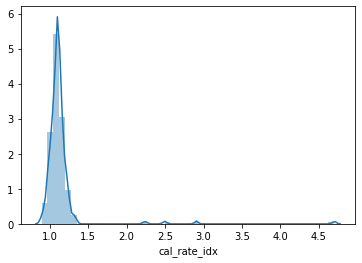

,activity_cal_rate,idle_cals_per_min,cal_rate_idx
count,216.000000,225.000000,216.000000
mean,1.803135,1.595770,1.134888
std,0.427463,0.110007,0.308686
min,1.307692,0.524177,0.893862
25%,1.686542,1.527823,1.048209
50%,1.765276,1.593611,1.100774
75%,1.841829,1.669298,1.142771
max,7.000000,1.801118,4.701541


In [122]:
coef_light=3
coef_mod=4.5
coef_heavy=6


df['energy_mins']=(coef_light*df.mins_light)+(coef_mod*df.mins_mod)+(coef_heavy*df.mins_heavy)
df['activity_cal_rate'] = df.activity_cals / df.energy_mins
df['cal_rate_idx'] = df.activity_cal_rate/df.idle_cals_per_min
sns.distplot(df.cal_rate_idx.dropna())
plt.show()
df[['activity_cal_rate','idle_cals_per_min','cal_rate_idx']].describe()

In [213]:
cals_lr_fields=[
    'mins_idle',
    'mins_light',
    'mins_mod',
    'mins_heavy',
    
]
cals_lr_target = 'cals_burned'

X_cals = df[cals_lr_fields].copy()
for col in X_cals.columns:
    X_cals[col+'_pct'] = X_cals[col] / 1440
X_cals=X_cals.drop(columns=cals_lr_fields)
y_cals = df.cals_burned / (df.cals_burned - df.activity_cals) # / 1440

In [214]:
X_cals.head()

,mins_idle_pct,mins_light_pct,mins_mod_pct,mins_heavy_pct
date,,,,
2018-04-26,0.935417,0.064583,0.000000,0.000000
2018-04-27,0.804167,0.152083,0.031944,0.011806
2018-04-28,0.869444,0.107639,0.015278,0.007639
2018-04-29,0.915278,0.084722,0.000000,0.000000
2018-04-30,0.927778,0.072222,0.000000,0.000000


In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
cals_lr = LinearRegression(fit_intercept=False).fit(X_cals, y_cals)

In [217]:
cals_lr.score(X_cals, y_cals)

0.980236532084011

In [218]:
cals_lr.coef_

array([ 0.92310921,  5.15335402,  8.63270867, 11.65516412])

In [219]:
for coef in range(len(cals_lr.coef_+1)):
    print(coef, cals_lr.coef_[coef]/cals_lr.coef_[0])

0 1.0
1 5.58260493979936
2 9.351773989965817
3 12.62598621603517


In [220]:
df['cals_burned_pred']= cals_lr.predict(X_cals)

In [202]:
df.head()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,...,week_day,cals_idle,mins_idle,idle_cals_per_min,non_idle_cals,daily_rest_cals,energy_mins,activity_cal_rate,cal_rate_idx,cals_burned_pred
date,,,,,,,,,,,,,,,,,,,,,
2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0,1440.0,...,4-Thu,2069.0,1347.0,1.536006,628.531250,2211.848552,279.0,2.028674,1.320746,2582.337961
2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0,1440.0,...,5-Fri,1897.0,1158.0,1.638169,1924.062500,2358.963731,966.0,1.813665,1.107129,3590.038666
2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0,890.0,...,6-Sat,2255.0,1252.0,1.801118,1514.041667,2593.610224,630.0,1.784127,0.990566,3098.190524
2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0,1013.0,...,0-Sun,2249.0,1318.0,1.706373,887.729167,2457.177542,366.0,1.644809,0.963921,2705.289989
2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0,984.0,...,1-Mon,2285.0,1336.0,1.710329,834.916667,2462.874251,312.0,1.730769,1.011951,2628.974937


In [203]:
from evaluate import regression_errors
cals_errors = regression_errors(df.cals_burned, df.cals_burned_pred)
for k in cals_errors:
    print(k, cals_errors[k])

ESS 81934753.7697246
MSE 34031.29978887838
SSE 7657042.452497635
TSS 89591796.22222222
RMSE 184.4757430907337


In [204]:
cals_lr.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': False}